In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
print(tf.__version__)
print(keras.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)  # OK. Esto devuelve (60000, 28, 28) ==> 60000 imágenes de 28 pixels por 28 pixels.
print(X_train_full.dtype)  # 8 bit unsigned integer 

2.4.1
2.4.0
(60000, 28, 28)
uint8


In [3]:
# Separo en training y validation. Me dejo un 10% del training para validation (5000 registros)
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
# Estoy dividiendo por 255.0 para normalizar y, de paso, convertirlo en float.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Tengo 10 clases distintas. Esto es una multi-class classification. 

In [5]:
class_names[y_train[0]]

'Coat'

#### OK. Ahora a crear la red neuronal

In [7]:
# Acá empieza la magia
model = keras.models.Sequential()  ## Creo el modelo. Va a ser una instancia de la clase Sequential. Lo creo con los parameters por default.
model.add(keras.layers.Flatten(input_shape=[28, 28]))  ## .add() es un método de la clase sequential. Es decir, que va a modificar algo en el objeto que acabo de crear (para pensar en términos de OOP)
# En esta línea se aplana la entrada. Se pasan de imágenes de 28x28 a un array de 1-D de 784.
model.add(keras.layers.Dense(300, activation="relu"))  ## Acá creo la primera capad de mi ANN.
# Recordar que una "Dense" es una layer cuyos outputs están todos conectados a los inputs de la siguiente layer. 
# Repaso de terminología. 
# Perceptron --> Layer de TLUs. TLU (threshold logic unit)--> n inputs, 1 output ("neurona"). Dense Layer --> TODOS los outputs de la layer anterior, conectados a TODOS los inputs de la layer actual.
# La función de activación de esto es la "relu" rectified linear unit. (lineal del para valores positivos. 0 para valores negativos)
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
# COMPILANDO EL MODELO:
model.compile(
    loss=keras.metrics.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy]
)  # Compilo el modelo. Defino la loss function, el método de optimización, y qué métrica quiero usar. 
# lo de sparse categorical es porque tengo labels definidos (un número del 0 al 9). Si esto estuviera encoded, por ejemplo, (cada target es un vector con todo 0 y un 1 en la posición correspondiente a ese target), no pondría sparse. Sería únicamente categorical.

# FITTEANDO EL MODELO (igual que sci-kit)
history = model.fit(
    x=X_train, y=y_train, epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 1s 735us/step - loss: 0.9966 - sparse_categorical_accuracy: 0.6832 - val_loss: 0.5049 - val_sparse_categorical_accuracy: 0.8336
Epoch 2/30
1719/1719 [==============================] - 1s 678us/step - loss: 0.5033 - sparse_categorical_accuracy: 0.8249 - val_loss: 0.4694 - val_sparse_categorical_accuracy: 0.8384
Epoch 3/30
1719/1719 [==============================] - 1s 696us/step - loss: 0.4541 - sparse_categorical_accuracy: 0.8418 - val_loss: 0.4077 - val_sparse_categorical_accuracy: 0.8656
Epoch 4/30
1719/1719 [==============================] - 1s 679us/step - loss: 0.4263 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.4429 - val_sparse_categorical_accuracy: 0.8462
Epoch 5/30
1719/1719 [==============================] - 1s 690us/step - loss: 0.3970 - sparse_categorical_accuracy: 0.8603 - val_loss: 0.4015 - val_sparse_categorical_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 1s 677us/step - loss: 0.

Joya. Tenemos un modelo funcionando con un 92% de accuracy sobre la training data y 89% de accuracy sobre la validation data. 

In [9]:
print("History params:", history.params)
print("History values", history.history)


History params: {'verbose': 1, 'epochs': 30, 'steps': 1719}
History values {'loss': [0.7246980667114258, 0.49068930745124817, 0.44490423798561096, 0.41664257645606995, 0.3961452841758728, 0.37946760654449463, 0.36552658677101135, 0.35479122400283813, 0.3436741232872009, 0.33359968662261963, 0.3261985182762146, 0.3179590106010437, 0.31012049317359924, 0.3028598129749298, 0.29669642448425293, 0.2914673388004303, 0.28429725766181946, 0.27887433767318726, 0.27367502450942993, 0.2693606913089752, 0.26471391320228577, 0.2585376799106598, 0.25532013177871704, 0.249792218208313, 0.2453540414571762, 0.24249690771102905, 0.23711563646793365, 0.23390723764896393, 0.2302909940481186, 0.2269698679447174], 'sparse_categorical_accuracy': [0.7611091136932373, 0.8298545479774475, 0.8447999954223633, 0.8548363447189331, 0.8604363799095154, 0.8669818043708801, 0.8728181719779968, 0.8750545382499695, 0.878563642501831, 0.8814363479614258, 0.8836727142333984, 0.8868908882141113, 0.8888182044029236, 0.89099

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Grafico todo:
history_df = pd.DataFrame(history.history)
history_df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.724698,0.761109,0.504906,0.8336
1,0.490689,0.829855,0.469372,0.8384
2,0.444904,0.844800,0.407688,0.8656
3,0.416643,0.854836,0.442891,0.8462
4,0.396145,0.860436,0.401465,0.8588
5,0.379468,0.866982,0.373546,0.8706
6,0.365527,0.872818,0.365922,0.8726
7,0.354791,0.875055,0.348948,0.8778
8,0.343674,0.878564,0.383073,0.8664
9,0.333600,0.881436,0.355150,0.8716


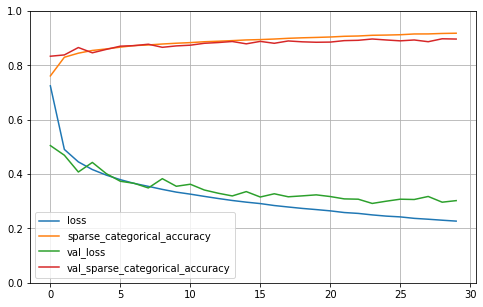

In [17]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # gca --> get current axes. method que devuelve los axes del objeto plot.
plt.show()

#### Se ve cómo mejora con cada epoch. Notar que para el training set es más smooth. Mejora a cada epoch. Para el validation, va bajando pero es más rippled.

### Evaluación de modelo

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 617us/step - loss: 69.8057 - sparse_categorical_accuracy: 0.8413


[69.80571746826172, 0.8413000106811523]

### Predicción:

In [21]:
X_new = X_test[:10]  # Tomo los 3 primeros items de X_test como si fueran nuevas observaciones. 

In [22]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

... OK... no parece que me esté dando las probabilidades. Me está diciendo las categorías directamente...

In [24]:
X_new2 = X_test[-10:]

In [25]:
model.predict(X_new2)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9993253e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.7420624e-05, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

#### Veo en el segundo item (pos=0) de este array tiene valores distintos de 1 y 0. 

In [26]:
# Si no me interesan las probabilities y quiero únicamente la predicción:
model.predict_classes(X_new2)

/home/panza/Desktop/Panza/Projects/virtual_envs/ho-ml/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 0, 8, 9, 1, 9, 1, 8, 1, 5])

In [27]:
import numpy as np

In [29]:
# Otra forma de hacer lo mismo de acuerdo a los warnings.
np.argmax(model.predict(X_new2), axis=-1)

array([5, 0, 8, 9, 1, 9, 1, 8, 1, 5])

In [30]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [34]:
# Mirá qué forma piola de transformar un array en otro... sigo insistiendo con el diccionario...
np.array(class_names)[np.argmax(model.predict(X_new2), axis=-1)]

array(['Sandal', 'T-shirt/top', 'Bag', 'Ankle boot', 'Trouser',
       'Ankle boot', 'Trouser', 'Bag', 'Trouser', 'Sandal'], dtype='<U11')

In [38]:
X_new2[0].shape

(28, 28)

End of the joke